# Medical Cost Personal Case Study in USA(Prediction of insurance costs)


**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the data**

In [2]:
df=pd.read_csv('insurance.csv')

**Analyzing rows and columns**

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**Checking for null values**

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

*As there are no null values in the columns so we can proceed with data visualization and preprocessing.*

**Getting overall info from the data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Getting statistical info from the columns of data**

In [7]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [8]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [10]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [11]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## Data Visualization

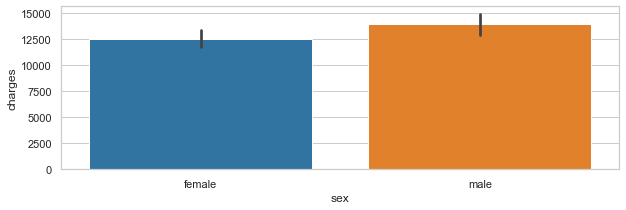

In [13]:
plt.figure(figsize=(10,3))
sns.set_context('notebook',font_scale=1)
sns.set_style('whitegrid')
sns.barplot(x='sex',y='charges',data=df)

*The plot shows that males tend to spend more on treatment than females.*

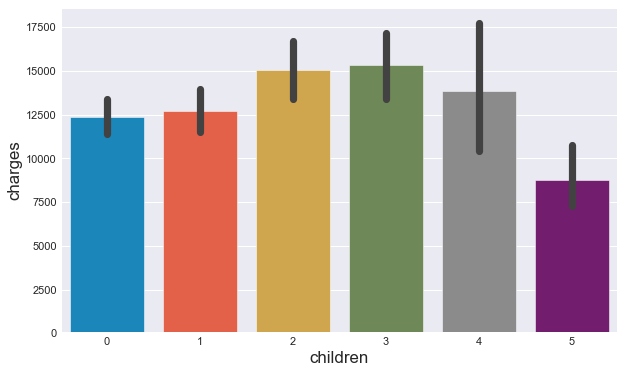

In [14]:
plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
sns.barplot(x='children',y='charges',data=df)

*The plot shows that the number of children covered by health insurance is mostly for three children and less for five children.*

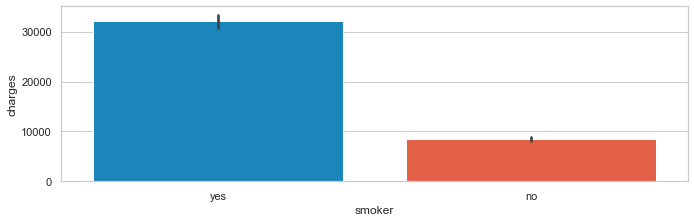

In [15]:
plt.figure(figsize=(10,3))
sns.set_context('notebook',font_scale=1)
sns.set_style('whitegrid')
sns.barplot(x='smoker',y='charges',data=df)

*The plot shows that smoker be liable to spend more on treatment.*

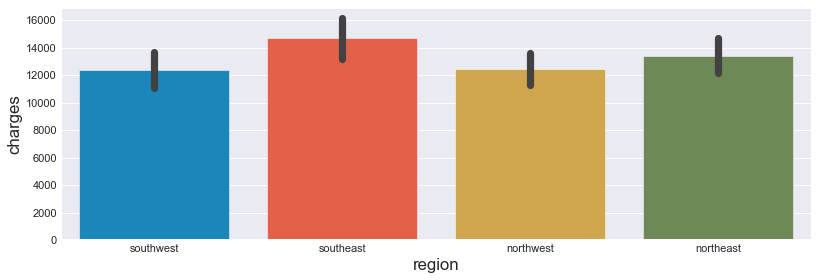

In [16]:
plt.figure(figsize=(12,4))
sns.set_context('notebook',font_scale=1)
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
sns.barplot(x='region',y='charges',data=df)

*The plot shows that the southeast region of the United States is liable to spend more on treatment.*

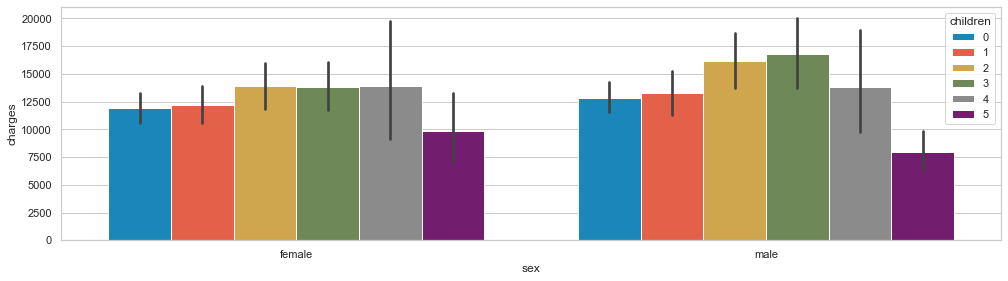

In [17]:
plt.figure(figsize=(15,4))
sns.set_context('notebook',font_scale=1)
sns.set_style('whitegrid')
sns.barplot(x='sex',y='charges',hue='children',data=df)

*The plot shows that in females the number of children covered by health insurance is almost the same for 2,3,4 children and in males, the number of children covered by health insurance is mostly for 3 children.*

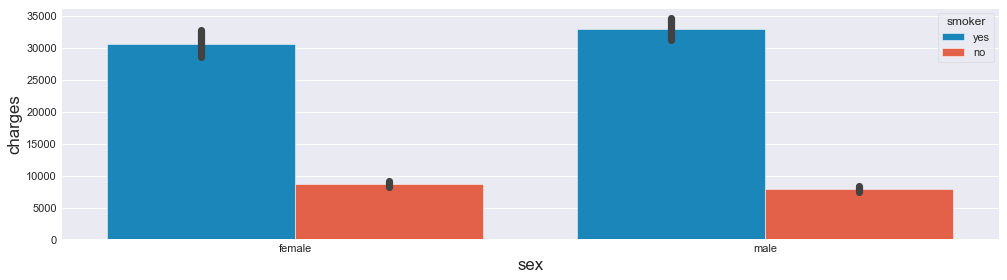

In [18]:
plt.figure(figsize=(15,4))
sns.set_context('notebook',font_scale=1)
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
sns.barplot(x='sex',y='charges',hue='smoker',data=df)

*The plot shows that the smoker in both male and female gender tends to spend more on treatment.*

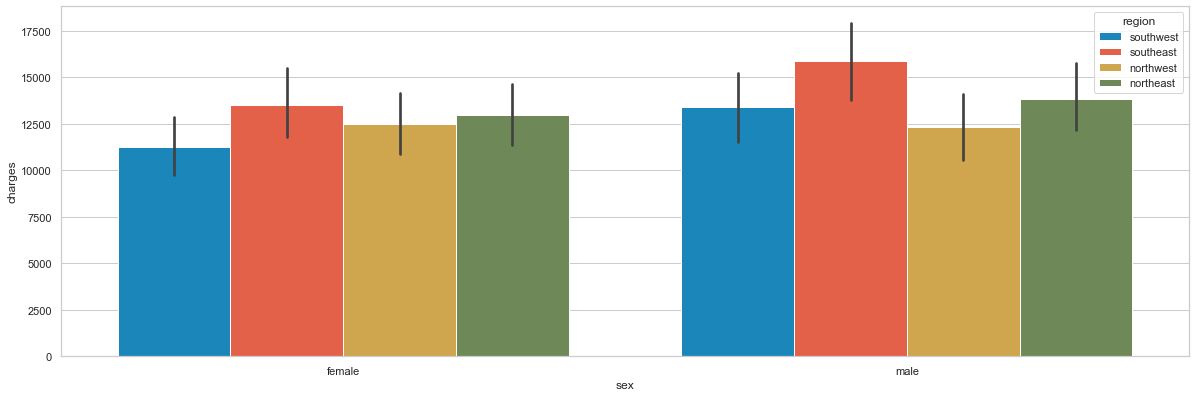

In [19]:
plt.figure(figsize=(18,6))
sns.set_context('notebook',font_scale=1)
sns.set_style('whitegrid')
sns.barplot(x='sex',y='charges',hue='region',data=df)

*The plot shows that in both male and female gender southeast region side is more likely to spend on treatments.*

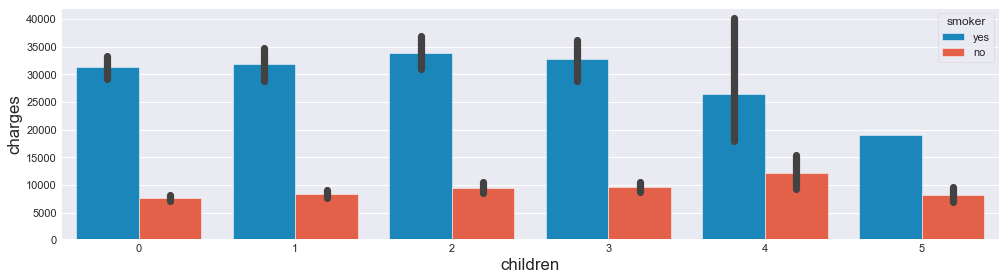

In [20]:
plt.figure(figsize=(15,4))
sns.set_context('notebook',font_scale=1)
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
sns.barplot(x='children',y='charges',hue='smoker',data=df)

*The plot shows that the smoker having the number of children(0-5) is likely to spend on treatments.*

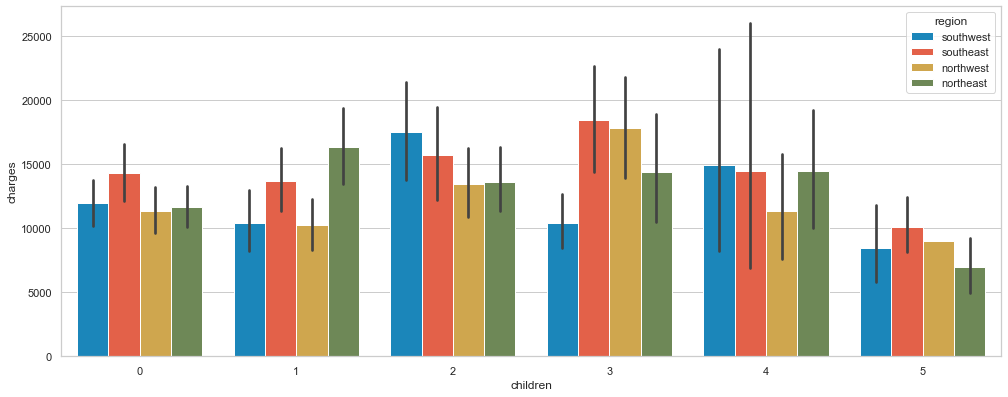

In [21]:
plt.figure(figsize=(15,6))
sns.set_context('notebook',font_scale=1)
sns.set_style('whitegrid')
sns.barplot(x='children',y='charges',hue='region',data=df)

*The plot shows that for (0,3,5) children - southeast region, 1 child - northeast region, (2,4) children - southwest region tend to spend more on treatment.*

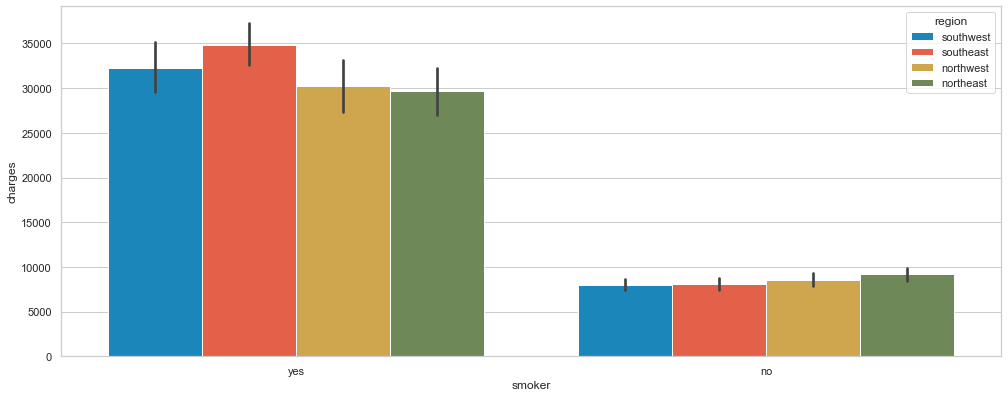

In [22]:
plt.figure(figsize=(15,6))
sns.set_context('notebook',font_scale=1)
sns.set_style('whitegrid')
sns.barplot(x='smoker',y='charges',hue='region',data=df)

*The plot shows that the smoker from the southeast region and non-smoker from the northeast region likely to spend more on treatment.*

## Data Preprocessing 

**Changing object type for columns to categorical type**

In [23]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


**Separating the dependent and independent columns**

In [25]:
X=df.iloc[:,:-1].values

In [26]:
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [27]:
y=df.iloc[:,6].values

In [28]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

**Encoding the Independent Columns**

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
from sklearn.compose import ColumnTransformer

In [31]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')

In [32]:
X = np.array(ct.fit_transform(X), dtype=np.float)

In [33]:
X


array([[ 1.  ,  0.  ,  0.  , ..., 19.  , 27.9 ,  0.  ],
       [ 0.  ,  1.  ,  1.  , ..., 18.  , 33.77,  1.  ],
       [ 0.  ,  1.  ,  1.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 1.  ,  0.  ,  1.  , ..., 18.  , 36.85,  0.  ],
       [ 1.  ,  0.  ,  1.  , ..., 21.  , 25.8 ,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 61.  , 29.07,  0.  ]])

**Avoiding the Dummy Variable Trap**

In [34]:
X=X[:,1:] 

In [35]:
X

array([[ 0.  ,  0.  ,  1.  , ..., 19.  , 27.9 ,  0.  ],
       [ 1.  ,  1.  ,  0.  , ..., 18.  , 33.77,  1.  ],
       [ 1.  ,  1.  ,  0.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 0.  ,  1.  ,  0.  , ..., 18.  , 36.85,  0.  ],
       [ 0.  ,  1.  ,  0.  , ..., 21.  , 25.8 ,  0.  ],
       [ 0.  ,  0.  ,  1.  , ..., 61.  , 29.07,  0.  ]])

**Splitting the dataset into the Training set and Test set**

In [36]:
from sklearn.model_selection import train_test_split 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
X_train

array([[ 1.  ,  0.  ,  1.  , ..., 37.  , 34.1 ,  4.  ],
       [ 1.  ,  1.  ,  0.  , ..., 18.  , 34.43,  0.  ],
       [ 0.  ,  0.  ,  1.  , ..., 23.  , 36.67,  2.  ],
       ...,
       [ 1.  ,  1.  ,  0.  , ..., 40.  , 25.08,  0.  ],
       [ 1.  ,  1.  ,  0.  , ..., 19.  , 35.53,  0.  ],
       [ 0.  ,  1.  ,  0.  , ..., 33.  , 18.5 ,  1.  ]])

In [39]:
X_test

array([[ 1.   ,  1.   ,  0.   , ..., 52.   , 30.2  ,  1.   ],
       [ 0.   ,  1.   ,  0.   , ..., 47.   , 29.37 ,  1.   ],
       [ 1.   ,  0.   ,  1.   , ..., 48.   , 40.565,  2.   ],
       ...,
       [ 1.   ,  1.   ,  0.   , ..., 57.   , 40.28 ,  0.   ],
       [ 0.   ,  0.   ,  1.   , ..., 30.   , 39.05 ,  3.   ],
       [ 1.   ,  1.   ,  0.   , ..., 46.   , 24.795,  3.   ]])

In [40]:
 y_train

array([40182.246 ,  1137.4697, 38511.6283, ...,  5415.6612,  1646.4297,
        4766.022 ])

In [41]:
y_test

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

**Fitting the Multiple Linear Regression to the Training set**

In [42]:
from sklearn.linear_model import LinearRegression 

In [43]:
regressor=LinearRegression()

In [44]:
regressor.fit(X_train,y_train)

LinearRegression()

**Predicting the Test set results**

In [45]:
y_pred=regressor.predict(X_test)

In [46]:
y_pred

array([1.11699271e+04, 9.48670909e+03, 3.81811231e+04, 1.62663133e+04,
       6.91464801e+03, 3.96348488e+03, 1.57939691e+03, 1.43852566e+04,
       9.01257970e+03, 7.50846068e+03, 4.49176728e+03, 1.02795839e+04,
       8.80129751e+03, 3.79802013e+03, 2.79262010e+04, 1.07151158e+04,
       1.12889756e+04, 6.10501768e+03, 8.24104117e+03, 2.71445089e+04,
       3.36440910e+04, 1.43551043e+04, 1.17372043e+04, 3.21374335e+04,
       4.17005913e+03, 9.25496051e+03, 1.08433751e+03, 9.80417085e+03,
       3.77104596e+03, 1.04318587e+04, 9.00931722e+03, 4.00749509e+04,
       1.56889543e+04, 1.38794545e+04, 2.47597127e+04, 5.16638285e+03,
       1.26109277e+04, 3.07691018e+04, 3.35498325e+04, 3.67154946e+03,
       3.97568613e+03, 3.98729942e+03, 3.05285774e+04, 3.95053023e+04,
       2.78105036e+04, 5.09258923e+03, 1.06042481e+04, 7.82952256e+03,
       3.59255553e+03, 1.02128745e+04, 5.72038147e+03, 3.42627499e+03,
       3.30210242e+04, 3.84738218e+04, 1.60534782e+04, 7.16491905e+03,
      

**Checking the values for regression coefficient, intercept and score**

In [47]:
print(regressor.intercept_)
print(regressor.coef_)
print(regressor.score(X_test, y_test))

-509.40497190664246
[   -15.46372787 -11802.50863374  11802.50863374    483.84006818
    223.70733587   -429.43876573   -278.10863831    253.7004996
    335.96281427    436.9101206 ]
0.7999876970680433


**Calculating the Accuracy of the predictions and comparing Actual and Predicted Salaries for the test set**

In [48]:
from sklearn import metrics
print("Prediction Accuracy = ", metrics.r2_score(y_test, y_pred))

print("\nActual vs Predicted Salaries \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred,
                         "Abs. Error" : np.abs(y_test - y_pred)})

error_df

Prediction Accuracy =  0.7999876970680433

Actual vs Predicted Salaries 
------------------------------



,Actual,Predicted,Abs. Error
0,9724.53000,11169.927119,1445.397119
1,8547.69130,9486.709085,939.017785
2,45702.02235,38181.123053,7520.899297
3,12950.07120,16266.313289,3316.242089
4,9644.25250,6914.648007,2729.604493
...,...,...,...
263,15019.76005,14760.230968,259.529082
264,6664.68595,8277.984346,1613.298396
265,20709.02034,16149.973370,4559.046970
266,40932.42950,32904.758143,8027.671357
